Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron, QuantileRegressor, SGDClassifier, Lasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.manifold import TSNE
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# !pip install ipywidgets                   # descomentar si falta el paquet
from ipywidgets import interact

import warnings
warnings.filterwarnings("ignore")


# Funcio per a llegir dades en format csv

url = 'https://raw.githubusercontent.com/AlbertRoca29/Datasets/main/datasets/mushrooms.csv'

def load_dataset(path):
    dataset = pd.read_csv(url, header=0, delimiter=',')
    return dataset

dataset = load_dataset(url)

# Visualització del dataset

Primera visualització del dataset per coneixer les variables i decidir que fer.

| This | is   |
|------|------|
|a|table|


| This | is   |
|------|------|
|a|table is really| 


| Name | Variables que pot pendre |
|------|------|
|cap-shape| bell |
|cap-surface| fibrous |
|cap-color| brown|

| Name | Variables que pot pendre |
|------|------|
cap-shape| bell=b |
cap-surface| fibrous=f|
cap-color| brown=n|

| Name | Variables que pot pendre |
|------|------|
cap-shape| bell=b|
cap-surface| fibrous=f,grooves=g,scaly=y,smooth=s|
cap-color| brown=n|

| Name | Variables que pot pendre |
|------|------|
cap-shape| bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s |
cap-surface| fibrous=f,grooves=g,scaly=y,smooth=s|
cap-color| brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y|

| Name | Variables que pot pendre |
|------|------|
cap-shape| bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s |
cap-surface| fibrous=f,grooves=g,scaly=y,smooth=s|
cap-color| brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y|
bruises| bruises=t,no=f|
odor| almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s|
gill-attachment| attached=a,descending=d,free=f,notched=n|
gill-spacing| close=c,crowded=w,distant=d|
gill-size| broad=b,narrow=n|
gill-color| black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y|
stalk-shape| enlarging=e,tapering=t|
stalk-root| bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?|
stalk-surface-above-ring| fibrous=f,scaly=y,silky=k,smooth=s|
stalk-surface-below-ring| fibrous=f,scaly=y,silky=k,smooth=s|
stalk-color-above-ring| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y|
stalk-color-below-ring| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y|
veil-type| partial=p,universal=u|
veil-color| brown=n,orange=o,white=w,yellow=y|
ring-number| none=n,one=o,two=t|
ring-type| cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z|
spore-print-color| black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y|
population| abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y|
habitat| grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d |
class| edible=e, poisonous=p|

In [78]:
pd.set_option('display.max_columns', None)
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


El que veiem més pràctic fer, és crear un classifier , que identifiqui els bolets verinosos, per tant, la variable a predir és "class"

In [4]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Montar la base de dades

Al dataset.describe() hem pogut veure que el nombre de unique values és menor al que en teoria pot pendre (segons la web).
Per exemple, la columna veil-type només té un possible valor i per tant, no ens serveix.

In [11]:
print(' %-27s %-48s %s\n'%('Nom','Possibles valors', 'nombre'),
      '-'*85)
_=[print(' %-27s %-50s %d'%(col,dataset[col].unique(),len(dataset[col].unique()))) for col in dataset]

 Nom                         Possibles valors                                 nombre
 -------------------------------------------------------------------------------------
 class                       ['p' 'e']                                          2
 cap-shape                   ['x' 'b' 's' 'f' 'k' 'c']                          6
 cap-surface                 ['s' 'y' 'f' 'g']                                  4
 cap-color                   ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']          10
 bruises                     ['t' 'f']                                          2
 odor                        ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']              9
 gill-attachment             ['f' 'a']                                          2
 gill-spacing                ['c' 'w']                                          2
 gill-size                   ['n' 'b']                                          2
 gill-color                  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']  12
 stalk

La variable veil-type la borrem, ja que només té una possible sortida.

la variable a predir class: Poisonous  = 0 , Eatable = 1. 

D'aquesta manera si marquem en verd el True i el vermell el False, seria com marcar el verinos de color vermell i el comestible verd.

In [12]:
dataset.drop(['veil-type'],axis=1)
X = dataset.drop(['class'],axis=1)
y = dataset['class'] == 'e'     # class: Poisonous  = 0 , Eatable = 1 

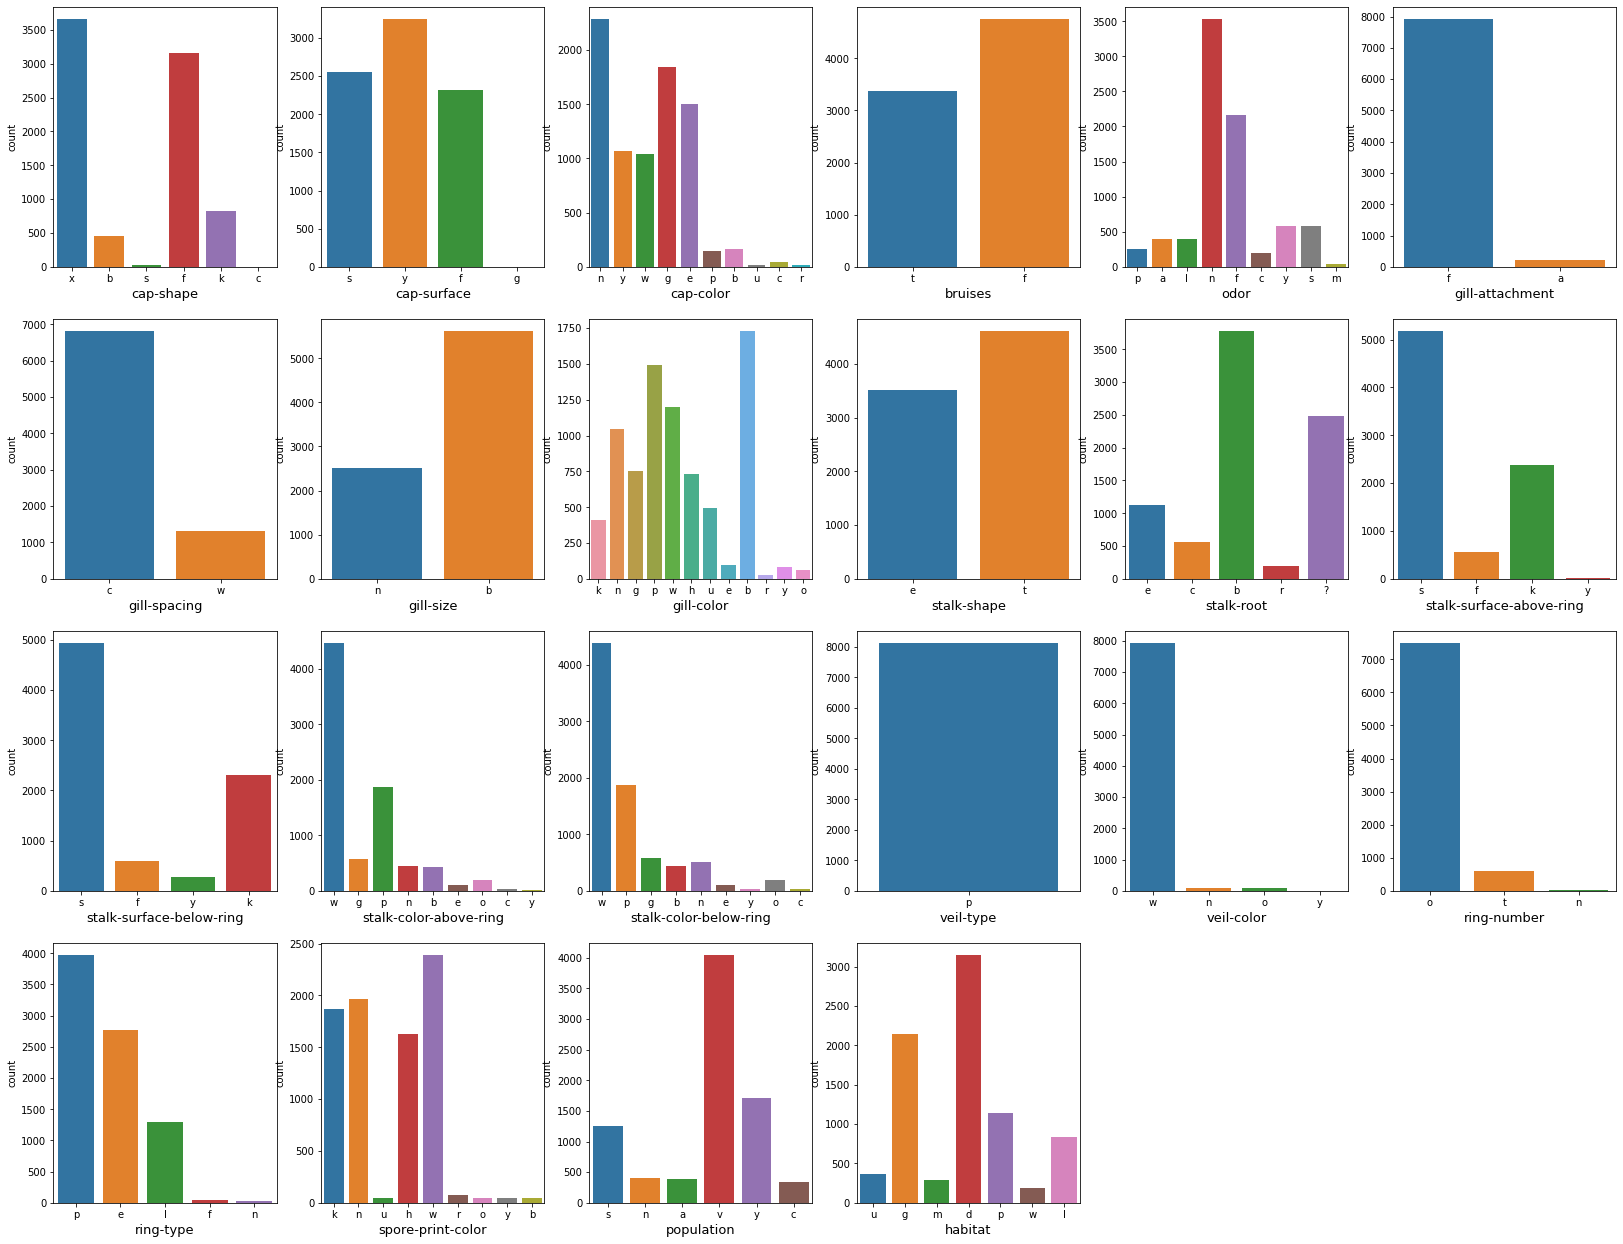

In [17]:
fig = plt.figure(figsize=(28,22))
i=1
for col in X.columns:
    ax = fig.add_subplot(4,6, i)
    b = sns.countplot(data = dataset, x = col)
    b.set_xlabel(col,fontsize=13)
    i+=1

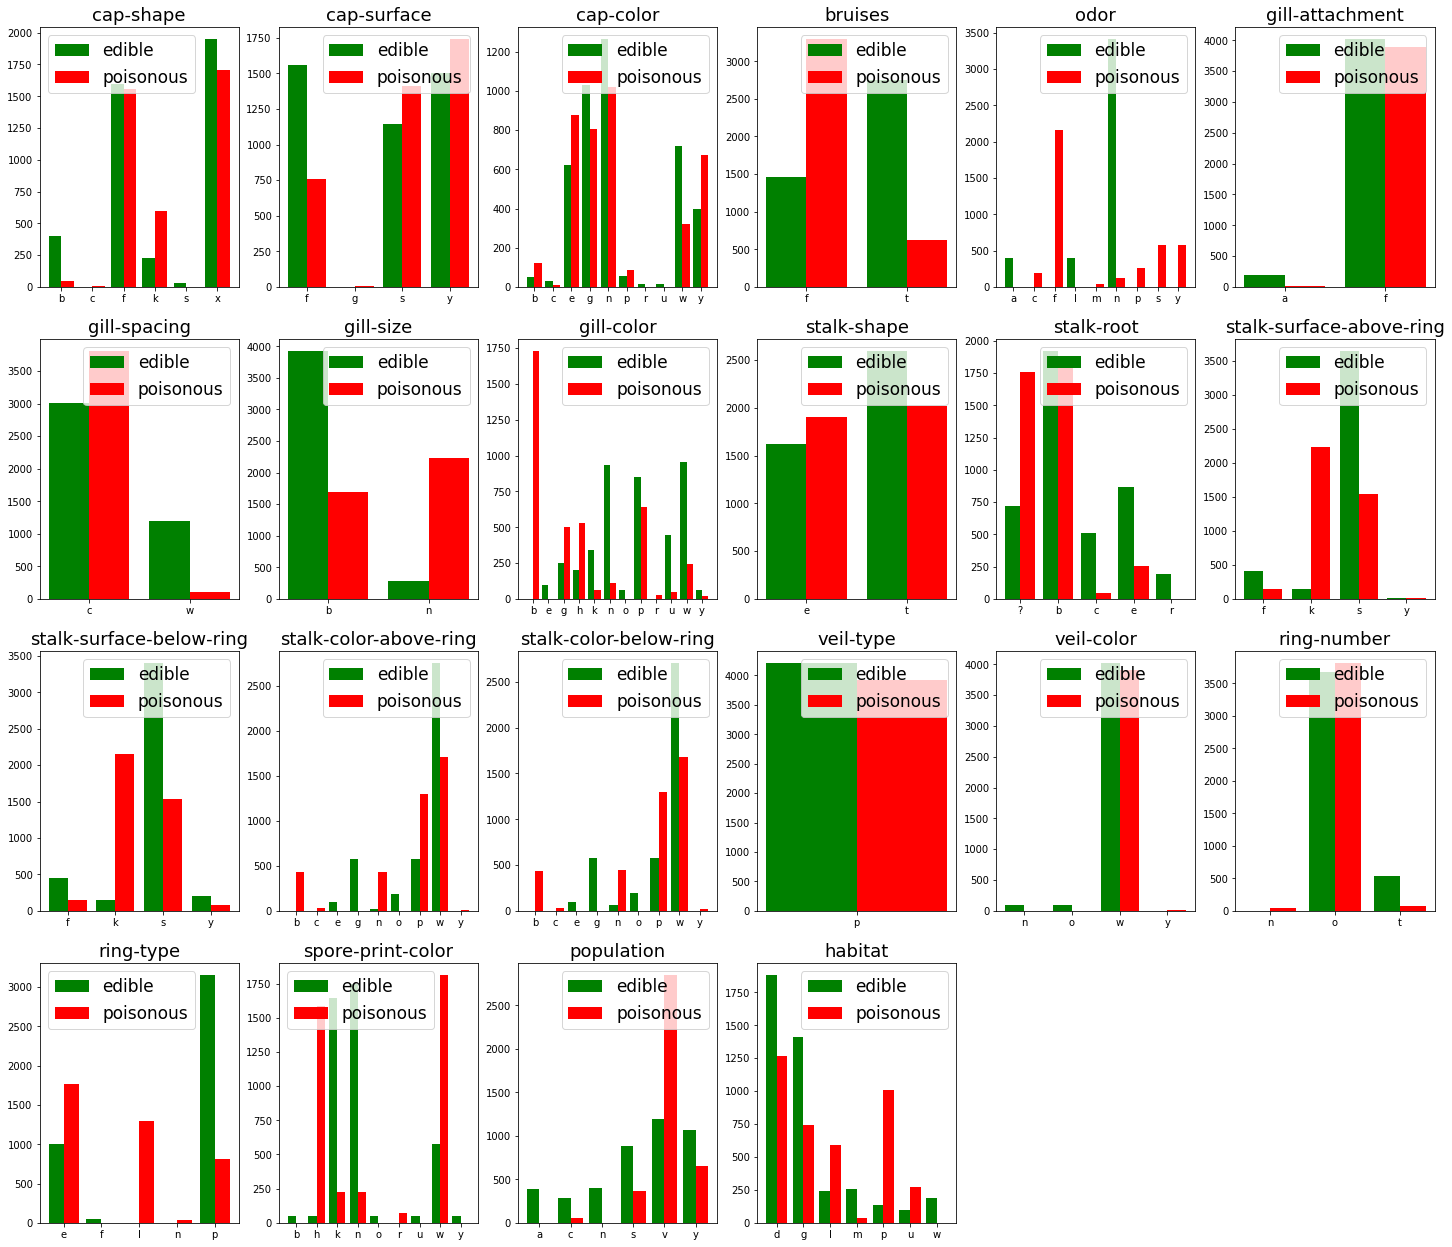

In [18]:
fig = plt.figure(figsize=(25,22))
a=1  
for c in X.columns:
    ax = fig.add_subplot(4,6, a)
    poisonous = [] 
    edibles = []    
    for i in np.unique(X[c]):
        size = len(dataset[dataset[c] == i].index)
        e = len(dataset[(dataset[c] == i) & (dataset['class'] == 'e')].index)
        edibles.append(e)
        poisonous.append(size-e)
    width = 0.40
    ind = np.arange(len(np.unique(X[c])))
    edible_bars = plt.bar(ind, edibles , width, color='green')
    poison_bars = plt.bar(ind+width, poisonous , width, color='red')
    
    ax.set_title(c,fontsize=18)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(np.unique(X[c]))
    ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
    a+=1

Amb aquests plots ja podem fer deduccions com per exemple que la olor ens serveix per definir força ja tot , i molt possiblement els millors atributs estaran relacionats amb la olor.

Ara converteixo, totes les columnes en dummies, no utilitzo el mínim nombre de dummies (que seria amb el drop_first activat) ja que penso que és més visual d'aquesta manera. Tot i que no aconsegueixi cap millora significativa.



In [19]:
X_dummy = pd.get_dummies(X,columns=X.columns) #drop_first=True)
X_dummy.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


També cal normalitzar , per facilitar feina a certs models.

In [22]:
mm = make_pipeline(StandardScaler(), MinMaxScaler())

X_norm = mm.fit_transform(X_dummy)

Veiem si les diferents classes estan balancejades.

In [ ]:
print(sum(y)/y.shape[0])

0.517971442639094


Un 48.2% del bolets del dataset són verinosos. No caldrà utilitzar cap estrategia per balancejar el dataset

Funció per avaluar models , calcula l'accuracy mitjana així que dificulta el 100% d'accuracy. A més pot printar la matriu i el report.

In [69]:
def print_score(classifier,X_train,y_train,X_test,y_test,matriu=False,report=False, average = True):
    print('\n',type(classifier).__name__)
    if(average):
        res = cross_val_score(classifier, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}'.format(res.mean()))
    else:
        print('%-50s Accuracy Score: %.4f\n' % (classifier,accuracy_score(y_test,classifier.predict(X_test))))
    # print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    if(report): print('Classification Report:\n{}'.format(classification_report(y_test,classifier.predict(X_test))))
    if(matriu): print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

# Classifier amb moltes variables.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

models = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    LinearSVC(), 
    Perceptron(), 
    SGDClassifier(),
    LinearDiscriminantAnalysis(),  
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
]


for classifier in models:  
    t = time.time()
    classifier.fit(X_train,y_train)
    print_score(classifier,X_train,y_train,X_test,y_test,matriu = False)
    print("temps = %3.4fs"%(time.time()-t))


 LogisticRegression
Average Accuracy:	0.9771
temps = 0.5974s

 SVC
Average Accuracy:	1.0000
temps = 0.7794s

 LinearSVC
Average Accuracy:	0.9743
temps = 0.2521s

 Perceptron
Average Accuracy:	0.9796
temps = 0.1956s

 SGDClassifier
Average Accuracy:	0.9840
temps = 0.2920s

 LinearDiscriminantAnalysis
Average Accuracy:	0.9675
temps = 0.2484s

 KNeighborsClassifier
Average Accuracy:	1.0000
temps = 0.5073s

 GaussianNB
Average Accuracy:	0.9202
temps = 0.1347s

 DecisionTreeClassifier
Average Accuracy:	1.0000
temps = 0.1398s

 RandomForestClassifier
Average Accuracy:	1.0000
temps = 1.0932s


LogisticRegression             [0.88445 0.88445 0.88445 0.87953 0.93018 0.97714 0.97714 0.97714 0.97714 0.97714 0.97714 0.97749 0.97415 0.97415 0.97626 0.97626 0.97626]
SVC                            [0.88445 0.88445 0.88445 0.89483 0.93018 0.97714 0.97714 0.97714 0.97714 0.97819 0.97819 0.98927 0.99455 0.99455 0.99631 1.      1.     ]
LinearSVC                      [0.88445 0.88445 0.88445 0.87531 0.93018 0.97714 0.96711 0.96711 0.96711 0.97503 0.97327 0.97116 0.97133 0.97133 0.97133 0.97133 0.97133]
Perceptron                     [0.88445 0.88445 0.87038 0.87636 0.90274 0.97714 0.97714 0.97714 0.97467 0.95111 0.94654 0.93739 0.9599  0.95058 0.97415 0.9504  0.95304]
SGDClassifier                  [0.88445 0.88445 0.88445 0.89483 0.92772 0.97714 0.97714 0.97714 0.97714 0.97714 0.97714 0.97503 0.97995 0.98312 0.97995 0.97731 0.97731]
LinearDiscriminantAnalysis     [0.88445 0.88445 0.88445 0.88445 0.93018 0.97274 0.96658 0.96658 0.96412 0.96412 0.96658 0.96518 0.96447 0.96447 0.96359 0.9

(0.825, 1.001)

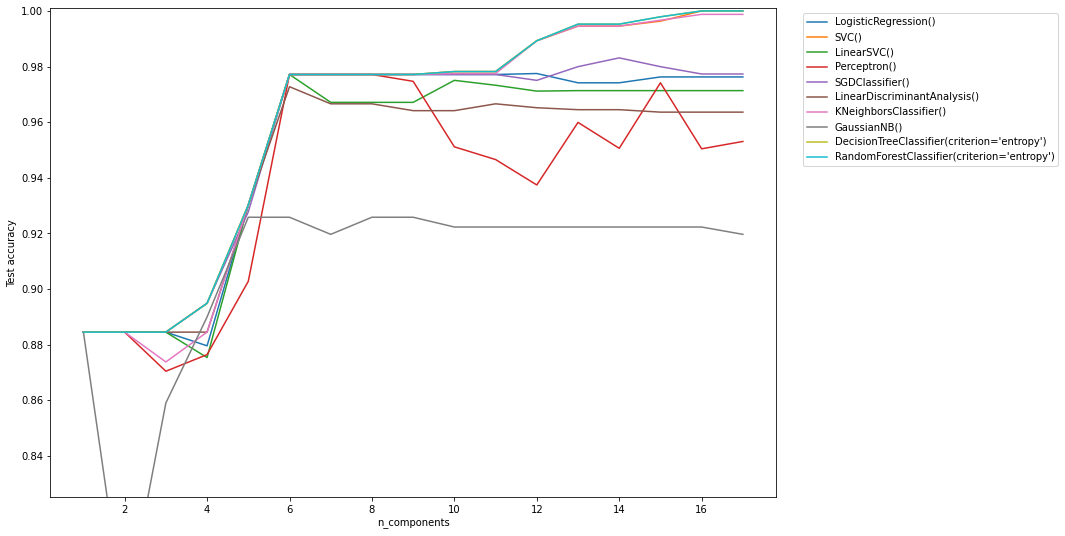

In [26]:
plt.figure(figsize=(13,9))
def k_features_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final):
    selector = [0] + [SelectKBest(score_func=chi2, k=i) for i in range(1,n_final+1)]
    acc =[]
    for i in range(1,n_final+1):
        X_train_r = selector[i].fit_transform(X_train,y_train)
        X_test_r = selector[i].transform(X_test)
        classifier.fit(X_train_r,y_train)
        res = cross_val_score(classifier, X_train_r, y_train, cv=2, n_jobs=-1, scoring='accuracy').mean()
        acc.append(res)
    plt.plot(range(1,n_final+1),acc,label = classifier)
    print(type(classifier).__name__.ljust(30, ' '),np.array(acc))


np.set_printoptions(precision=5, linewidth=np.inf)
for classifier in models:  
    k_features_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,17)
np.set_printoptions(precision=None, linewidth= None)
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))
plt.ylim([0.825, 1.001])

Es pot veure com tenim un molt bon primer component, i que amb 6 components trobem una accuracy superior al 97.5% en 9 dels 10 models.

Per 4 models, en concret els models:

    - SVC(kernel='rbf'),
    - KNeighborsClassifier(n_neighbors = 5),
    - DecisionTreeClassifier(criterion='entropy'),
    - RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
veiem que segueix pujant l'accuracy de manera força constant i a les 14 o 15 iteracions, supera el 99% d'accuracy i abans de les 20, a nivell de accuracy, serà un model tan bo com si estiguessim treballant amb tota la base de dades.

Primer de tot , vull visualitzar els resultats amb el millor atribut.

In [27]:
BK1 = SelectKBest(score_func=chi2,k=1)
BK1.fit(X_train,y_train)
s = BK1.get_support()

# Com és un sol atribut , amb un sol model en tenim prou.
LR = LogisticRegression()
LR.fit(X_train[:,s],y_train)
print_score(LR,X_train[:,s],y_train,X_test[:,s],y_test,matriu = True)

LogisticRegression
Average Accuracy:	0.8845

Confusion Matrix:
[[1108   32]
 [ 231 1067]]



Em sembla super interessant que un sol atribut pugui predir tan bé si els bolets son verinosos o no, així que vull detectar de quina variable es tracta.

odor_n
[[4.76874]]


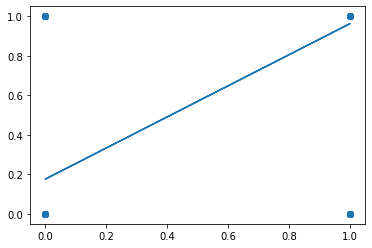

In [29]:
index = np.where(s)[0]
print(X_dummy.columns[index][0])

y_values = LR.predict_proba(X_test[:,index])[:,1] 
plt.plot(X_test[:,index], y_values)
plt.scatter(X_test[:,index], y_test)
print(LR.coef_)

odor_n correspon als bolets que no fan olor. Per tant, els bolets que no fan olor són molt més propensos a ser comestibles.

Ara , ja per curiositat, vull veure quins són els següents atributs que classifiquen millor per si sols. Penso que tot i computacionalment no ser molt interessant a la pràctica sembla lo més interessant, la gent busca un sol indicador per veure si són perillosos o no. A veure si surt algo més interessant.

Primer de tot visualitzem el heatmap, tot i que al ser tan gran no ens diu re encara.

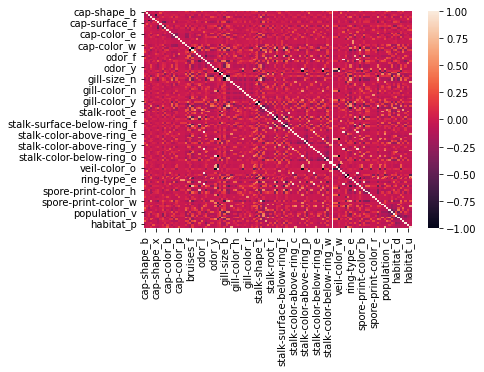

In [31]:
c = X_dummy.corr()
sns.heatmap(c)

Així que ara probem un model amb totes les variables per seperat i a veure quin va millor.

In [39]:
LR = LogisticRegression()

D = {}
for i in range(X_train.shape[1]):
    LR.fit(X_train[:,i].reshape(-1, 1),y_train)
    D[X_dummy.columns[i]] = [accuracy_score(y_test,LR.predict(X_test[:,i].reshape(-1, 1))) , sum((LR.predict(X_test[:,i].reshape(-1, 1))!=y_test)[~y_test])/X_train.shape[0] ,int(np.sign(LR.coef_))]

print("Nom \t\t\t\t Accuracy\tFalsos Comestibles \tSigne de la correlació\n","-"*90)
_= [print("%-32s %.5f\t%.5f\t\t\t %d"%(i,j[0],j[1],j[2])) for i,j in dict(sorted(D.items(), key=lambda item: item[1][0],reverse=True)).items() if j[0]>0.75]

Nom 				 Accuracy	Falsos Comestibles 	Signe de la correlació
 ------------------------------------------------------------------------------------------
odor_n                           0.89212	0.00563			 1
odor_f                           0.78958	0.09022			 -1
stalk-surface-above-ring_k       0.77441	0.08952			 -1
stalk-surface-below-ring_k       0.77235	0.09005			 -1
ring-type_p                      0.76907	0.04362			 1
gill-size_b                      0.76046	0.08758			 1
gill-size_n                      0.76046	0.08758			 -1


Aquí podem veure que odor_n , no només és el millor atribut en solitari, sinó que a més , és el que dona menys falsos comestibles, que és el que interessaria.

Aquí veiem els resultats utilitzant 6 atributs

In [40]:
m = SelectKBest(score_func=chi2,k=6)
m.fit(X_train,y_train)
s = m.get_support()
for classifier in models:  
    classifier.fit(X_train[:,s],y_train)
    print_score(classifier,X_train[:,s],y_train,X_test[:,s],y_test,matriu = False)

LogisticRegression
Average Accuracy:	0.9771

SVC
Average Accuracy:	0.9771

LinearSVC
Average Accuracy:	0.9748

Perceptron
Average Accuracy:	0.9224

SGDClassifier
Average Accuracy:	0.9771

LinearDiscriminantAnalysis
Average Accuracy:	0.9727

KNeighborsClassifier
Average Accuracy:	0.9771

GaussianNB
Average Accuracy:	0.9258

DecisionTreeClassifier
Average Accuracy:	0.9771

RandomForestClassifier
Average Accuracy:	0.9771



# PCA
Anteriorment , he pogut veure que agafant 6 atributs puc aconseguir un bon model, i agafant-ne 18 un exelent model.

Però ara vull veure si agafant només 2 o 3 utilitzant un PCA es pot aconseguir un model tan bó com els anteriors.

L'objectiu és saber a quin nombre de components he de reduir l'espai, per aconseguir una bona accuracy, si amb 2 o 3 són suficients es podrà fer un plot per visualitzar-ho.

Per això creare diferents subsets. Les variables que trio per a cada un són aconseguides a partir d'un PCA per a cada nombre de variables.

In [47]:
def pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final,print_all=True):
    pca = [0,0]+[PCA(n_components=i) for i in range(2,n_final+1)]
    acc =[]
    for i in range(2,n_final+1):
        X_train_r = pca[i].fit_transform(X_train)
        X_test_r = pca[i].transform(X_test)
        classifier.fit(X_train_r,y_train)
        acc.append(accuracy_score(y_test,classifier.predict(X_test_r)))
    if(print_all):
        print(type(classifier).__name__.ljust(30, ' '),np.array(acc))
    plt.plot(range(2,n_final+1),acc,label = classifier)
    

LogisticRegression             [0.85357 0.95365 0.95816 0.96801 0.96719 0.96965]
SVC                            [0.95119 0.96719 0.96555 0.98769 0.99344 0.99426]
LinearSVC                      [0.85357 0.96021 0.95816 0.96678 0.96637 0.96965]
Perceptron                     [0.8671  0.9114  0.83757 0.9557  0.96514 0.97252]
SGDClassifier                  [0.87367 0.96514 0.96555 0.96473 0.96473 0.97949]
LinearDiscriminantAnalysis     [0.85357 0.94709 0.94709 0.96801 0.96103 0.97703]
KNeighborsClassifier           [1. 1. 1. 1. 1. 1.]
GaussianNB                     [0.9032  0.91386 0.90566 0.90238 0.90525 0.91099]
DecisionTreeClassifier         [1.      1.      1.      0.99959 1.      1.     ]
RandomForestClassifier         [1. 1. 1. 1. 1. 1.]


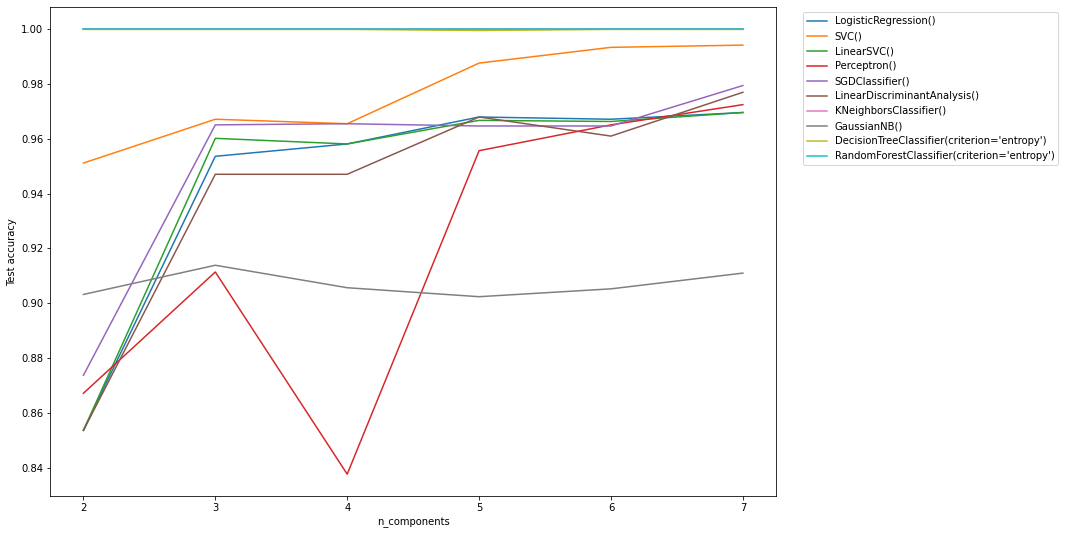

In [ ]:
plt.figure(figsize=(13,9))

for classifier in all_models:  
    pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final = 7)
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))


Tant aquí com en el best_k_features, veiem que 4 dels 10 models destaquen per sobre la resta.
Bé el SVC està una mica al mig, però l'agafo també. 


In [76]:
models = [
    SVC(kernel='rbf'), 
    KNeighborsClassifier(n_neighbors = 5),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
]

all_models = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    LinearSVC(), 
    Perceptron(), 
    SGDClassifier(),
    LinearDiscriminantAnalysis(),  
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
]


A més , tenim molts atributs i crec que es podria reduir molt la dimensió del dataset si abans hem vist que amb menys de 20 atributs ja aconseguim molt bones accuracys.

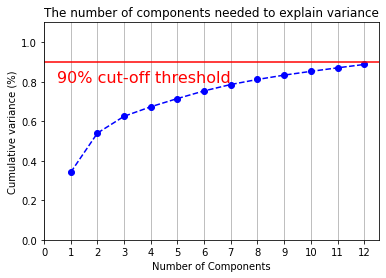

13


In [44]:
pca = PCA(n_components = 0.9).fit(X_train)
pc = pca.transform(X_train)
nc = int(pca.n_components_)

fig, ax = plt.subplots()
xx = np.arange(1, nc, step=1)
yy = np.cumsum(pca.explained_variance_ratio_[:(nc-1)])

plt.ylim(0.0,1.1)
plt.plot(xx, yy, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, nc, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 0.8, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()
print(nc)

Com hem vist anteriorment, amb molt pocs atributs ja aconsegueixo una molt bona accuracy, tot i així he volgut mantenir un 90% de variança i per tant n'he mantingut 31 atributs , que ja és una reducció significativa del dataset.

In [45]:
if (X_norm.shape[1]>50):
    m = SelectKBest(score_func=chi2,k=31)
    m.fit(X_train,y_train)
    s = m.get_support()

    X_norm = X_norm[:,s]
    X_train = X_train[:,s]
    X_test = X_test[:,s]

    for classifier in models:  
        classifier.fit(X_train,y_train)
        t = time.time()
        print_score(classifier,X_train,y_train,X_test,y_test,matriu = True)
        print("temps = %3.4fs"%(time.time()-t))

SVC                            [0.94135 0.96308 0.96185]
KNeighborsClassifier           [1. 1. 1.]
DecisionTreeClassifier         [1. 1. 1.]
RandomForestClassifier         [1. 1. 1.]


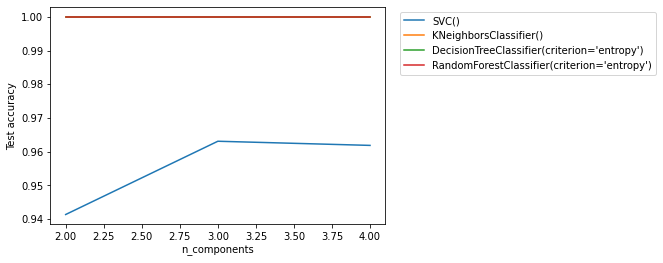

In [48]:
for classifier in models:  
    pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final = 4)
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))


amb els 3 millors models:

    - KNeighborsClassifier(n_neighbors = 5)
    - DecisionTreeClassifier(criterion='entropy')
    - RandomForestClassifier(n_estimators = 100, criterion = 'entropy')

aconsegueixo una accuracy perfecte tant en 2 com en 3 components.

El SVC, tot i que sembli que estigui molt per sota, aconsegueix un 94% i un 96% d'accuracy amb 2 i 3 components respectivament , i considero que segueien sent molt bons resultats.

## Visualització gràfica dels PCA de dimensió 2 i 3.

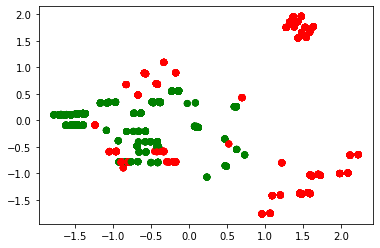

In [53]:
pca2 = PCA(2)
X_train_r = pca2.fit_transform(X_train)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], c=np.where(y_train == 0, 'r', 'g'))
plt.show()

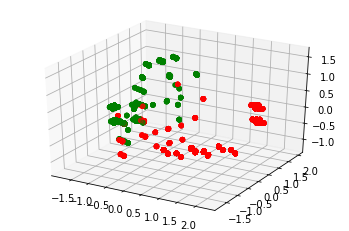

In [54]:
pca3 = PCA(3)
X_train_r = pca3.fit_transform(X_train)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_r[:, 0], X_train_r[:, 1], X_train_r[:, 2], c=np.where(y_train == 0, 'r', 'g'))
plt.show()


In [55]:
def plot_3d(elev, azim):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X_train_r[:, 0], X_train_r[:, 1], X_train_r[:, 2], c=np.where(y_train == 0, 'r', 'g'))
    ax.view_init(elev=elev, azim=azim)
    plt.show()

interact(plot_3d, elev=(0, 90), azim=(0, 360))

interactive(children=(IntSlider(value=45, description='elev', max=90), IntSlider(value=180, description='azim'…

<function __main__.plot_3d(elev, azim)>

per a dimensio 2, he aprofundit més

In [56]:
def visualization_test(model,X, y, step = 0.025):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = step),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = step))
    
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = 'rg'[i], label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

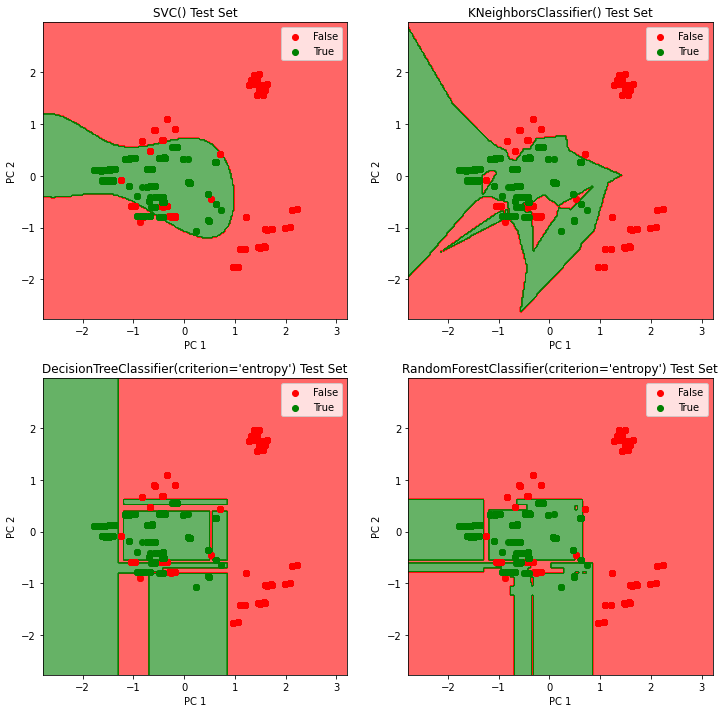

In [60]:
fig = plt.figure(figsize=(12,12))
i = 1
for classifier in models: 
    pca = PCA(2) 
    X_train_r = pca.fit_transform(X_train)
    X_test_r = pca.transform(X_test)
    classifier.fit(X_train_r,y_train)
    ax = fig.add_subplot(2,2, i)
    i+=1
    visualization_test(classifier,X_test_r,y_test)
plt.show()

## TSNE

T-sne és un algoritme no supervisat, per tant, no podem avaluar-lo, però si visualitzar-lo.

Doncs poso com a objectiu aconseguir una visualització 2d i 3d i comparar-les amb les visualitzacions del PCA.

Aquí ens trobem per primer cop amb una execució lenta, la següent cela pot trigar uns minuts en executar-se.

**TSNE 2 dimensions** 

La següent cel·la l'he comentat ja que triga molt en executar-se i només m'ha servit per veure quins arguments en el tsne em poden anar millor.

In [ ]:
# tsne2 = TSNE(n_components=2,n_iter=500, perplexity = 10) 
# X_tsne2 = tsne2.fit_transform(X_norm)
# plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
# plt.show()

# tsne2 = TSNE(n_components=2,n_iter=2000, perplexity = 20) 
# X_tsne2 = tsne2.fit_transform(X_norm)
# plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
# plt.show()

# tsne2 = TSNE(n_components=2,n_iter=1000, perplexity =80) 
# X_tsne2 = tsne2.fit_transform(X_norm)
# plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
# plt.show()

# tsne2 = TSNE(n_components=2,n_iter=2000, perplexity = 30) 
# X_tsne2 = tsne2.fit_transform(X_norm)
# plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
# plt.show()

# tsne2 = TSNE(n_components=2,n_iter=250, perplexity = 100)
# X_tsne2 = tsne2.fit_transform(X_norm)
# plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
# plt.show()

# tsne2 = TSNE(n_components=2,n_iter=1500, perplexity = 150)
# X_tsne2 = tsne2.fit_transform(X_norm)

# plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
# plt.show()

Tot i no ser d'aprenentatge supervisat, podem veure com funcionen els models en l'espai transformat. Seperarem el nou espai entre entrenament i test i calcularem l'accuracy per a cada model .

Després de moltíssimes proves, veig que la perplexity ha de ser força més gran a l'estandar i que el nombre d'iteracions pot arribar a perjudicar alguns models.

Tot i així el SVM va millor si augmentem el nombre d'iteracions ja que separarem més les mostres per grups.

Però al final m'he quedat amb n_iter = 300 i perplexity = 50. A més a més he afegit early_exaggeration = 35 que canvia la iniciació i el learning rate.




Cal remarcar, que a diferencia del PCA, que la transformació de l'espai és instentània. EL T-Sne segueix un algoritme més complicat i triga més en executar-se.

Per sort, he trobat que amb 300 iteracions funciona millor que amb 1000 (que es la que ve per defecte) i puc reduïr el temps significativament.

temps en fer el T-SNE = 24.1416s



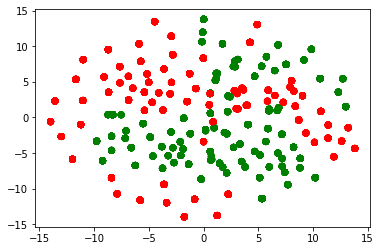


 LogisticRegression
Average Accuracy:	0.6177

 SVC
Average Accuracy:	0.9033

 LinearSVC
Average Accuracy:	0.6185

 Perceptron
Average Accuracy:	0.5723

 SGDClassifier
Average Accuracy:	0.6210


IndexError: ignored

In [75]:
t=time.time()
tsne2 = TSNE(n_components=2, n_iter=300, perplexity = 50, early_exaggeration=50) # he augmentat la perplexity respecte l'estandar ja que l'estandar (30) està pensat per dataset molt petits.
X_tsne2 = tsne2.fit_transform(X_norm)
print("temps en fer el T-SNE = %3.4fs\n"%(time.time()-t))
plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=np.where(y == 0, 'r', 'g'))
plt.show()

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tsne2, y, test_size=0.3)


acc = np.zeros((4,2))
i=0
for classifier in models:  
    # no mesuro temps ja que treballo sobre dimensió 2, i són massa petits com per tenir-los en compte
    classifier.fit(X_train_t,y_train_t)
    print_score(classifier,X_train_t,y_train_t,X_test_t,y_test_t)
    acc[i,0] = accuracy_score(y_test_t,classifier.predict(X_test_t))
    i+=1


També visualitzem com és la seperació tal i com hem vist al PCA 2d.

La següent cel·la pot trigar uns 2 minuts en executar-se. 

Si es vol veure els marges més precisos, utilitzar un step més petit (el temps augmenta exponencialment però)

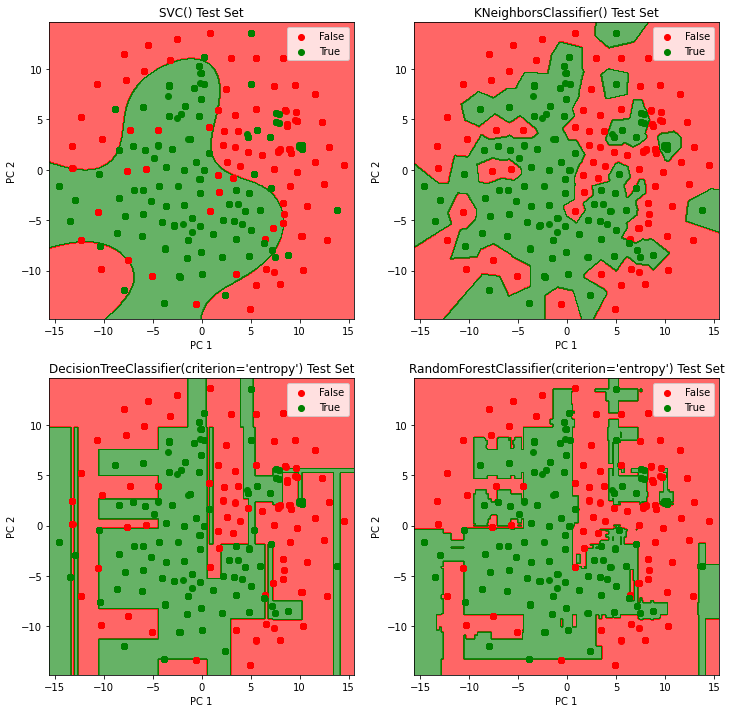

In [65]:
fig = plt.figure(figsize=(12,12))
i = 1

for classifier in models:  
    classifier.fit(X_train_t, y_train_t)
    ax = fig.add_subplot(2,2, i)
    i+=1
    visualization_test(classifier,X_test_t,y_test_t,step = 0.1) # augmentar l'step si es vol més ràpid, disminuir si es vol més precís.
plt.show()

TSNE 3 dimensions (aquest dura 3 o 4 vegades més, l'hagues pogut fer més ràpid però no he volgut sacrificar massa precisió)

temps en fer el T-SNE = 38.1400s



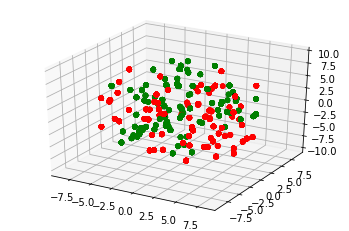


 SVC
Average Accuracy:	0.9446

 KNeighborsClassifier
Average Accuracy:	1.0000

 DecisionTreeClassifier
Average Accuracy:	1.0000

 RandomForestClassifier
Average Accuracy:	1.0000


In [77]:
t = time.time()
tsne3 = TSNE(n_components=3, n_iter=300, perplexity = 75)
X_tsne3 = tsne3.fit_transform(X_norm)
print("temps en fer el T-SNE = %3.4fs\n"%(time.time()-t))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne3[:, 0], X_tsne3[:, 1], X_tsne3[:, 2], c=np.where(y == 0, 'r', 'g'))
end = time.time()
plt.ion()
plt.show()

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tsne3, y, test_size=0.3)

i=0
for classifier in models: 
    # no mesuro temps ja que treballo sobre dimensió 3, i són massa petits com per tenir-los en compte
    classifier.fit(X_train_t,y_train_t)
    print_score(classifier,X_train_t,y_train_t,X_test_t,y_test_t)
    acc[i,1] = accuracy_score(y_test_t,classifier.predict(X_test_t))
    i+=1



In [ ]:
print(acc)

[[0.94299 0.97744]
 [1.      1.     ]
 [1.      1.     ]
 [1.      1.     ]]


In [ ]:
def plot_3d(elev, azim):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X_tsne3[:, 0], X_tsne3[:, 1], X_tsne3[:, 2], c=np.where(y == 0, 'r', 'g'))
    ax.view_init(elev=elev, azim=azim)
    plt.show()

interact(plot_3d, elev=(0, 90), azim=(0, 360))

interactive(children=(IntSlider(value=45, description='elev', max=90), IntSlider(value=180, description='azim'…

<function __main__.plot_3d(elev, azim)>

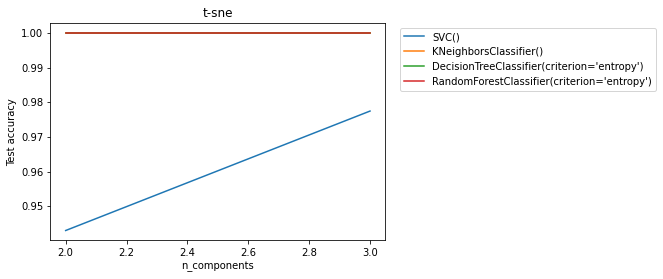

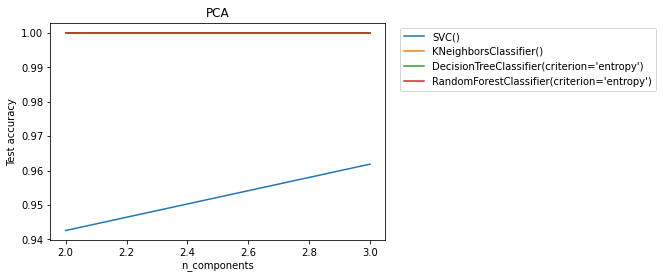

In [ ]:
for i in range(4):
    plt.plot(range(2,4),acc[i,:],label = models[i])

plt.title("t-sne")
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))
plt.show()

for classifier in models:  
    pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final = 3,print_all=False)

plt.title("PCA")
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))

Ja podem veure que el SVC està molt per sota dels altres 3.

Alerta !

El pca ens serveix per fer aprenentatge supervisat, com es tracta d'una transformació lineal de l'espai només cal que les dades a validar siguin també transformades.

En canvi el T-SNE no funciona de la mateixa manera,transforma totes les dades de manera no lineal i no podem afegir nova informació facilment. Per tant si no disposessim de les dades a validar, no podriem probar els models. Hauriem ,si tal , tornar a repetir el t-sne de nou amb totes les dades.



COMPARACIÓ DE RESULTATS

El dataset mushrooms.csv és un 